In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Import & Load Data

In [ ]:
from gensim.models import Word2Vec
from scipy import stats
import gensim.downloader as api
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import pickle
import json

#### Load Word Embedding

In [ ]:
## word embedding loading
'''
glove_model = api.load('glove-wiki-gigaword-300')
animal20 = ['mongoose', 'malamute', 'hamster', 'redshank', 'whippet', 'hippopotamus', 'siamang', 'skunk', 'zebra', 'coucal', 'hartebeest', 'koala', 'echidna', 'marmoset', 'scorpion', 'chow', 'spoonbill', 'limpkin', 'indri', 'platypus']
vehicles20 = ['gondola', 'fireboat', 'lifeboat', 'speedboat', 'convertible', 'dogsled', 'trimaran', 'limousine', 'plane', 'pickup', 'submarine', 'cab', 'oxcart', 'canoe', 'snowmobile', 'tank', 'unicycle', 'jeep', 'airship', 'streetcar']
fruitVege20 = ['artichoke', 'cauliflower', 'mushroom', 'pomegranate', 'broccoli', 'rapeseed', 'acorn', 'buckeye', 'pineapple', 'agaric', 'zucchini', 'lemon', 'gyromitra', 'bolete', 'earthstar','orange','banana','stinkhorn','jackfruit','corn']
word_list = animal20 + vehicles20 + fruitVege20
word_embedding = {word_list[i]: glove_model[word_list][i] for i in range(len(word_list))}

with open('gdrive/My Drive/1016/word_embedding.pickle', 'wb') as f:
    pickle.dump(word_embedding, f)
'''

"\nglove_model = api.load('glove-wiki-gigaword-300')\nanimal20 = ['mongoose', 'malamute', 'hamster', 'redshank', 'whippet', 'hippopotamus', 'siamang', 'skunk', 'zebra', 'coucal', 'hartebeest', 'koala', 'echidna', 'marmoset', 'scorpion', 'chow', 'spoonbill', 'limpkin', 'indri', 'platypus']\nvehicles20 = ['gondola', 'fireboat', 'lifeboat', 'speedboat', 'convertible', 'dogsled', 'trimaran', 'limousine', 'plane', 'pickup', 'submarine', 'cab', 'oxcart', 'canoe', 'snowmobile', 'tank', 'unicycle', 'jeep', 'airship', 'streetcar']\nfruitVege20 = ['artichoke', 'cauliflower', 'mushroom', 'pomegranate', 'broccoli', 'rapeseed', 'acorn', 'buckeye', 'pineapple', 'agaric', 'zucchini', 'lemon', 'gyromitra', 'bolete', 'earthstar','orange','banana','stinkhorn','jackfruit','corn']\nword_list = animal20 + vehicles20 + fruitVege20\nword_embedding = {word_list[i]: glove_model[word_list][i] for i in range(len(word_list))}\n\nwith open('gdrive/My Drive/1016/word_embedding.pickle', 'wb') as f:\n    pickle.dump(

In [ ]:
with open('gdrive/My Drive/1016/word_embedding.pickle', 'rb') as f:
    word_embedding = pickle.load(f)

In [ ]:
animal20 = list(word_embedding.keys())[0:20]
vehicles20 = list(word_embedding.keys())[20:40]
fruitVege20 = list(word_embedding.keys())[40:60]
word_list_full = animal20 + vehicles20 + fruitVege20

#### Load Image Embedding

In [ ]:
# Load the class index file
with open('gdrive/My Drive/1016/imagenet_class_index.json', 'r') as f:
    class_idx = json.load(f)

# Creat a dict mapping idex to label
idx2label = {class_idx[str(k)][0]:class_idx[str(k)][1] for k in range(len(class_idx))}

# Creat a dict mapping label to index
label2idx = {class_idx[str(k)][1]:class_idx[str(k)][0] for k in range(len(class_idx))}

In [ ]:
with open('/content/gdrive/My Drive/1016/output.pkl','rb') as f:
    outputs = pickle.load(f)
Animal_relu = outputs["Animal_relu"]
Animal_maxp = outputs["Animal_maxp"]
Vehicle_relu = outputs["Vehicle_relu"]
Vehicle_maxp = outputs["Vehicle_maxp"]
FV_relu = outputs["FV_relu"]
FV_maxp = outputs["FV_maxp"]

In [ ]:
def getNormalizedEmbed(domain, layer):
    output = {}
    for category in domain:
        cateName = idx2label[category]
        rawEmbed = domain[category][layer]
        zScoredEmbed = stats.zscore(rawEmbed)
        output[cateName] = zScoredEmbed
    return output

#### Normalize Image Embedding

In [ ]:
image_embedding = {}

##### Relu -13

In [ ]:
relu_list = ['features.1', 'features.3', 'features.6', 'features.8', 'features.11', 'features.13', 'features.15', 'features.18', 'features.20', 'features.22', 'features.25', 'features.27','features.29']
for idx,l in enumerate(relu_list):
  ani = getNormalizedEmbed(Animal_relu, l)
  veh = getNormalizedEmbed(Vehicle_relu, l)
  fv = getNormalizedEmbed(FV_relu, l)
  re = {**ani, **veh, **fv}
  name = 're' + str(idx+1)
  image_embedding.update({name:re})

##### classfier -2

In [ ]:
class_list = ['classifier.1', 'classifier.4']
for idx,l in enumerate(class_list):
  ani = getNormalizedEmbed(Animal_relu, l)
  veh = getNormalizedEmbed(Vehicle_relu, l)
  fv = getNormalizedEmbed(FV_relu, l)
  re = {**ani, **veh, **fv}
  name = 'fc' + str(idx+1)
  image_embedding.update({name:re})

##### maxpool -5

In [ ]:
maxp_list = ['features.4', 'features.9', 'features.16', 'features.23', 'features.30']
for idx,l in enumerate(maxp_list):
  ani = getNormalizedEmbed(Animal_maxp, l)
  veh = getNormalizedEmbed(Vehicle_maxp, l)
  fv = getNormalizedEmbed(FV_maxp, l)
  re = {**ani, **veh, **fv}
  name = 'mp' + str(idx+1)
  image_embedding.update({name:re})

#### Size Check

In [ ]:
image_embedding.keys()

dict_keys(['re1', 're2', 're3', 're4', 're5', 're6', 're7', 're8', 're9', 're10', 're11', 're12', 're13', 'fc1', 'fc2', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5'])

In [38]:
l= ['re1','re2','mp1',
             're3','re4','mp2',
             're5','re6','re7','mp3',
             're8','re9','re10','mp4',
             're11','re12','re13','mp5',
             'fc1','fc2']
for name in l:
  print(name)
  print(len(image_embedding[name]['lemon']))

re1
3211264
re2
3211264
mp1
802816
re3
1605632
re4
1605632
mp2
401408
re5
802816
re6
802816
re7
802816
mp3
200704
re8
401408
re9
401408
re10
401408
mp4
100352
re11
100352
re12
100352
re13
100352
mp5
25088
fc1
4096
fc2
4096


In [39]:
len(word_embedding['lemon'])

300

### Word Embedding Similarity Matries

#### Implement functions

vector_cos() sim_matrix() sim_heatmap() sim_cosine() 
 sim_spearman() sim_plot()

In [ ]:
## cosine similarity between two word embeddings
def vector_cos(e1,e2):
  '''
  input: e1,e2: np.ndarray, smae size
  output: cos_sim: numeric between [-1,1], cosine similarity between e1,e2
  '''
  cos_sim = np.dot(e1, e2)/(np.linalg.norm(e1)*np.linalg.norm(e2))
  return cos_sim

In [ ]:
## similarity matrix for a list of words, for "word" and "image" type
def sim_matrix(word_list, embedding_type="word"):
  '''
  input: word_list (list of str): list of words, length l
         embedding_type (str): "word" or image embedding type like 'cf2'
  output: m (DataFrame): similarity matrix, size l*l
  '''
  l = len(word_list)
  if embedding_type == "word":
    m = [vector_cos(word_embedding[x], word_embedding[y]) for x in word_list for y in word_list]
  else:
    m = [vector_cos(image_embedding[embedding_type][x], image_embedding[embedding_type][y]) for x in word_list for y in word_list]
  m = np.array(m).reshape((l,l))
  sim_mat = pd.DataFrame(data = m, index = word_list, columns = word_list)
  return sim_mat

In [ ]:
def sim_heatmap(df, cmap='bwr'):
    """
    input: df (DataFrame) : DataFrame with features to show similarity
           cmap (str) : Colormap to display correlation range
    """
    # Create mask for upper triangle of matrix
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True

    #Create heatmap correlation matrix
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(df, annot=False, ax=ax, cmap=cmap,vmin=-1, vmax=1, mask=mask);
    return fig, ax

In [ ]:
def sim_spearman(matrix1, matrix2):
  '''
  input: matrix1, matrix2 (2D Data Frame): similarity matrix, size of l*l, l is the length of words list
  output: sim_value: similarity values for two matrix
  ''' 
  m1 = matrix1.values
  m2 = matrix2.values
  idx = np.triu_indices(m1.shape[0],1)
  vec1 = m1[idx]
  vec2 = m2[idx]
  value,_= stats.spearmanr(vec1,vec2) 
  return value

In [ ]:
def sim_pearson(matrix1, matrix2):
  '''
  input: matrix1, matrix2 (2D Data Frame): similarity matrix, size of l*l, l is the length of words list
  output: sim_value: similarity values for two matrix
  ''' 
  m1 = matrix1.values
  m2 = matrix2.values
  idx = np.triu_indices(m1.shape[0],1)
  vec1 = m1[idx]
  vec2 = m2[idx]
  value,_= stats.pearsonr(vec1,vec2) 
  return value

#### Similarity matrix

In [ ]:
type_list = ['word','re1','re2','mp1',
             're3','re4','mp2',
             're5','re6','re7','mp3',
             're8','re9','re10','mp4',
             're11','re12','re13','mp5',
             'fc1','fc2']

In [ ]:
ani_mat = {}
veh_mat = {}
fv_mat = {}
for t in type_list:
  ani_mat.update({t:sim_matrix(animal20, embedding_type=t)})
  veh_mat.update({t:sim_matrix(vehicles20, embedding_type=t)})
  fv_mat.update({t:sim_matrix(fruitVege20, embedding_type=t)})

In [ ]:
full_word = sim_matrix(word_list_full, embedding_type='word')
full_fc2 = sim_matrix(word_list_full, embedding_type='fc2')

#### heatmap for 3 categories

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

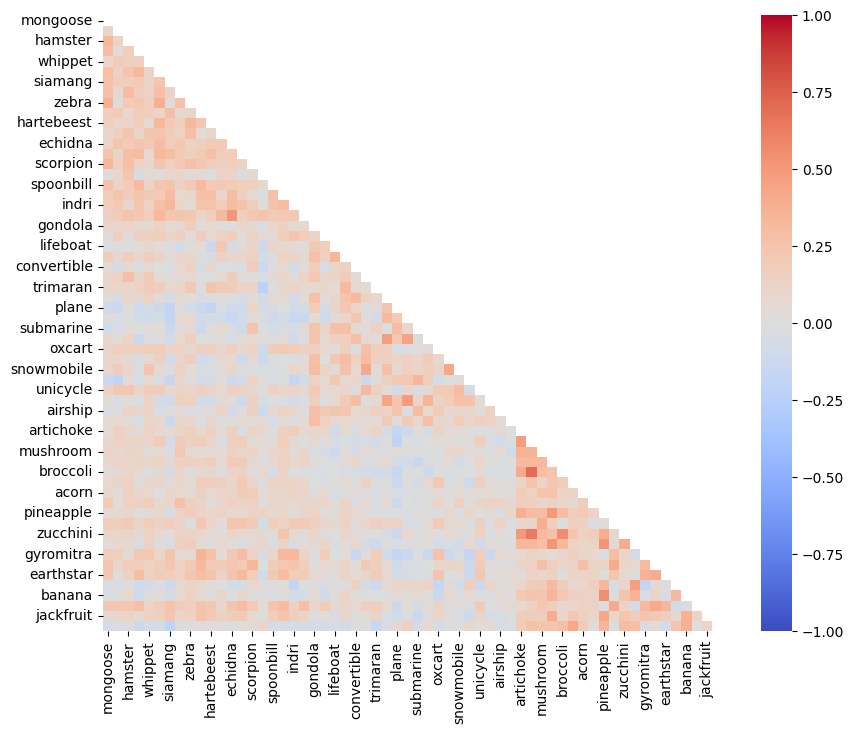

In [ ]:
sim_heatmap(full_word,cmap='coolwarm')

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

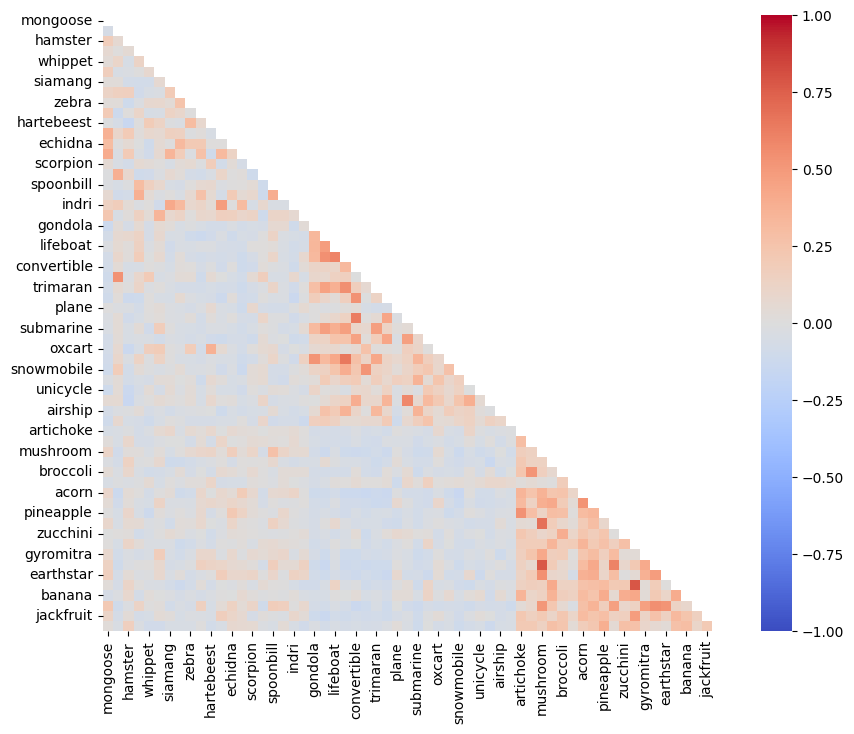

In [ ]:
sim_heatmap(full_fc2,cmap='coolwarm')

#### Correlation between Image Embedding and Word Embedding

In [ ]:
type_list.remove('word')

In [ ]:
ani_sim = []
veh_sim = []
fv_sim = []
for t in type_list:
  ani_sim.append(sim_spearman(ani_mat['word'], ani_mat[t]))
  veh_sim.append(sim_spearman(veh_mat['word'], veh_mat[t]))
  fv_sim.append(sim_spearman(fv_mat['word'], fv_mat[t]))

In [ ]:
print(ani_sim)
print(veh_sim)
print(fv_sim)

[-0.05255634723807775, -0.015596583080738496, -0.10554221504896624, -0.20852567719473206, -0.15749933297467056, -0.12270204306577966, -0.07257672978257163, -0.03160519098794106, 0.07994768771842346, 0.08579126699821106, 0.1713122247153661, 0.21701286374750142, 0.22221609871100093, 0.21231875500269, 0.20356213395618192, 0.20450690425890208, 0.17003328565742457, 0.16947517134896578, 0.21539975593433847, 0.25022153988811474]
[0.22934736492190338, 0.18569547778696305, 0.26413065823371695, 0.36063019678340713, 0.4180162448004829, 0.4469419622354316, 0.410104668302519, 0.44166699471191073, 0.43922983724581965, 0.4441443923945991, 0.420337930340686, 0.4385405048397609, 0.4375117549545768, 0.4436352661759111, 0.4657813819015253, 0.4564718952704624, 0.45755313239468665, 0.4587288465491827, 0.4526683200146965, 0.43055719578177565]
[0.26053003363557237, 0.3543527229942221, 0.3387885070442249, 0.32427753502429724, 0.3694445537928591, 0.3679906572714509, 0.20279931941546714, 0.2865707024979552, 0.3

In [ ]:
m1 = fv_mat['word'].values
m2 = fv_mat['fc2'].values
idx = np.triu_indices(m1.shape[0],1)
vec1 = m1[idx]
vec2 = m2[idx]
stats.spearmanr(vec1,vec2) 

SignificanceResult(statistic=0.47790943326903645, pvalue=3.108377212210694e-12)

#### Plot for similarity

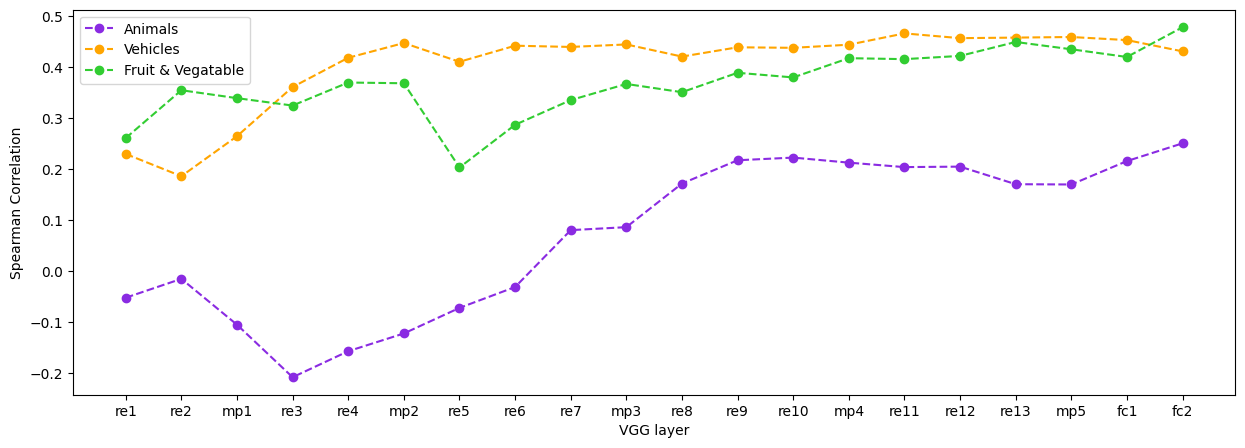

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(ani_sim,marker = 'o', linestyle='--',color= 'blueviolet',label = 'Animals')
plt.plot(veh_sim,marker = 'o', linestyle='--',color = 'orange', label = 'Vehicles')
plt.plot(fv_sim,marker = 'o', linestyle='--', color = 'limegreen',label = 'Fruit & Vegatable')
plt.xticks(list(range(len(type_list))), type_list)
plt.xlabel('VGG layer')
plt.ylabel('Spearman Correlation')
plt.legend()

#### Min and Max

In [ ]:
def min_max(matrix):
  m = matrix.values
  idx = np.triu_indices(m.shape[0],1)
  vec = m[idx]
  return np.min(vec), np.max(vec)

In [ ]:
Min = []
Max = []
for x in ani_mat.values():
  Min.append(min_max(x)[0])
  Max.append(min_max(x)[1])
print(Min)
print(Max)

[-0.042782806, 0.6102822, 0.25988245, 0.32993925, 0.45593995, 0.3025628, 0.27290037, 0.43036684, 0.45025125, 0.4415645, 0.38990346, 0.3777949, 0.33531913, 0.21692501, 0.20607048, 0.16501142, 0.08177179, -0.008863486, -0.012448581, -0.13074914, -0.14830488]
[0.5154259, 0.87847584, 0.7790775, 0.783489, 0.7356878, 0.58282757, 0.6147735, 0.7047989, 0.66755646, 0.6254799, 0.64287466, 0.6409268, 0.6479413, 0.5830485, 0.62458146, 0.63973147, 0.61018705, 0.51949775, 0.5492418, 0.47454602, 0.48175156]


### Analogy

In [ ]:
### find the top k closest words in word_list for a certain vector
def get_closed(w1, w2, w4, word_list, k, embedding_type = "word"):
  '''
  input: w1, w2, w4(str): word for analogy w1-w2 = w3-w4
         word_list(list of str): list of word
         k (int): top k closted
         embedding_type (str): "word" or "image"
  output: close_list (list of str): length k
  '''
  if embedding_type == "word":
    vector = word_embedding[w1] - word_embedding[w2] + word_embedding[w4]
    list_sim = [vector_cos(vector, word_embedding[x]) for x in word_list if x not in [w1,w2,w4] ]
  else: 
    vector = image_embedding[embedding_type][w1] - image_embedding[embedding_type][w2] + image_embedding[embedding_type][w4]
    list_sim = [vector_cos(vector, image_embedding[embedding_type][x]) for x in word_list if x not in [w1,w2,w4] ]
  list_close = [word_list[i] for i in np.flip(np.argsort(list_sim)[-k:])]
  return list_close

In [ ]:
get_closed('lemon','orange','zucchini', word_list_full, 3, "word")


['cauliflower', 'artichoke', 'broccoli']

In [ ]:
get_closed('lemon','orange','zucchini', word_list_full, 3, "fc2")

['broccoli', 'bolete', 'acorn']